In [151]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz
import torch

In [248]:
seed = 2
# expl_method = "LayerDL"
expl_method = "GradCAM"
data_num = 150
dataset = "center_crop_224"
orig_input_method = "center_crop_224"

In [249]:
with open(f"./val_{dataset}_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_dataset_{dataset}_orig_input_method_{orig_input_method}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n02730930/ILSVRC2012_val_00034302.JPEG
ILSVRC2012_val_00034302.JPEG


In [250]:
orig_expl = results[1]['orig_expl']

print(orig_expl.min(), orig_expl.max())

tensor(-0.0934) tensor(1.0240)


tensor(0.9009)


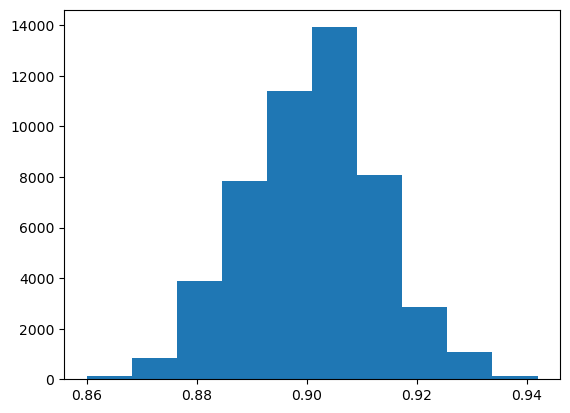

In [251]:
plt.hist(results[1]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[1]['coverage_prob'].flatten().mean())

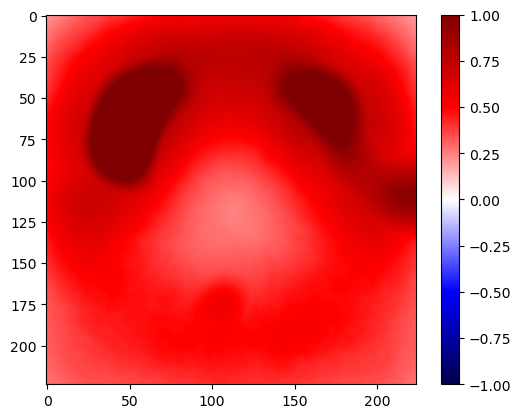

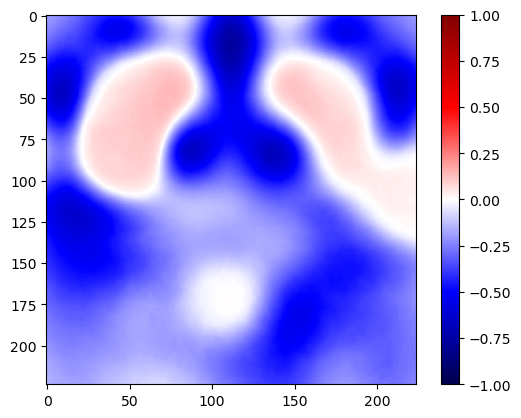

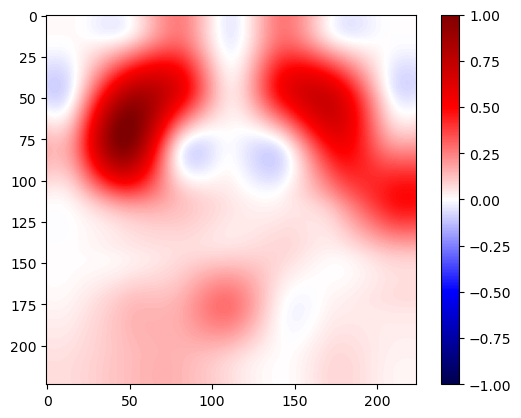

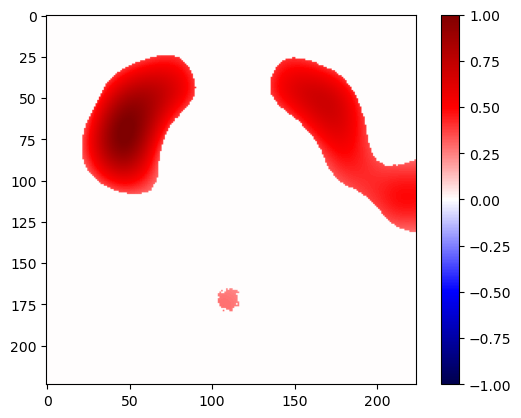

In [252]:
plt.imshow(results[1]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[1]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[1]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


mask = torch.where(torch.logical_and(results[1]['conf_high'] > 0, results[1]['conf_low'] < 0), torch.zeros_like(results[1]['orig_expl']), 1)

plt.imshow((results[1]['orig_expl'] * mask).squeeze(), cmap='seismic')
plt.clim(-1, 1)
plt.colorbar()
plt.show()



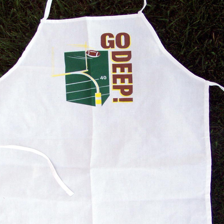

In [253]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


In [254]:
conf_high = results[1]['conf_high'].squeeze()
conf_low = results[1]['conf_low'].squeeze()
orig_expl = results[1]['orig_expl']

print(224 * 224)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high < 0))[0].shape)

print(torch.where(torch.logical_and(orig_expl > 0, conf_low > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl > 0, conf_low < 0))[0].shape)



np_idx = torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))



50176
torch.Size([5102])
torch.Size([0])
torch.Size([7681])
torch.Size([37393])


In [255]:
(conf_high - conf_low).mean()

tensor(0.8379)

In [247]:
print(np_idx)

for r, c in zip(np_idx[0], np_idx[1]):
    print(orig_expl[r, c], conf_high[r, c])

(tensor([  0,   0,   0,  ..., 223, 223, 223]), tensor([129, 130, 131,  ..., 150, 151, 152]))
tensor(-0.0001) tensor(0.3000)
tensor(-0.0008) tensor(0.2966)
tensor(-0.0015) tensor(0.2973)
tensor(-0.0022) tensor(0.2984)
tensor(-0.0028) tensor(0.3033)
tensor(-0.0033) tensor(0.3046)
tensor(-0.0039) tensor(0.3038)
tensor(-0.0043) tensor(0.3015)
tensor(-0.0047) tensor(0.2952)
tensor(-0.0051) tensor(0.3022)
tensor(-0.0054) tensor(0.3001)
tensor(-0.0056) tensor(0.2973)
tensor(-0.0058) tensor(0.3018)
tensor(-0.0059) tensor(0.3021)
tensor(-0.0058) tensor(0.3002)
tensor(-0.0058) tensor(0.3001)
tensor(-0.0056) tensor(0.2972)
tensor(-0.0054) tensor(0.2935)
tensor(-0.0052) tensor(0.2915)
tensor(-0.0049) tensor(0.2967)
tensor(-0.0046) tensor(0.2939)
tensor(-0.0042) tensor(0.2906)
tensor(-0.0038) tensor(0.2895)
tensor(-0.0033) tensor(0.2927)
tensor(-0.0028) tensor(0.2884)
tensor(-0.0023) tensor(0.2849)
tensor(-0.0017) tensor(0.2867)
tensor(-0.0011) tensor(0.2842)
tensor(-0.0005) tensor(0.2820)
tensor(-